<a href="https://colab.research.google.com/github/Tejasri-Pendota/FMML_Projects_and_Labs/blob/main/Face_Mast_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install kaggle

In [38]:
!mkdir -p ~/.kaggle  #making a directory called .kaggle
!cp kaggle.json ~/.kaggle/ # copying kaggle.json into the directory .kaggle
!chmod 600 ~/.kaggle/kaggle.json # is used to change the permissions of the kaggle.json file.

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [39]:
!kaggle datasets download -d omkargurav/face-mask-dataset #API command to download dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [40]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset , "r") as zip:
  zip.extractall()
  print("Dataset is extracted")

Dataset is extracted


In [41]:
!ls
#directories

data  face-mask-dataset.zip  sample_data


In [42]:
import os
#The os module includes a wide range of functions for file and directory manipulation,
#process management, environment variable handling, and more
import numpy as np # we'll convert theses images into numy arrays
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow #will show an image in a seperate window
from PIL import Image # image processing lib to do some opertaions on image
from sklearn.model_selection import train_test_split

In [43]:
with_mask_files = os.listdir('/content/data/with_mask')
# creat a list which contains all the file names in with mask folder

print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_106.jpg', 'with_mask_3382.jpg', 'with_mask_18.jpg', 'with_mask_3494.jpg', 'with_mask_964.jpg']
['with_mask_3339.jpg', 'with_mask_1109.jpg', 'with_mask_1262.jpg', 'with_mask_1282.jpg', 'with_mask_2564.jpg']


In [44]:
without_mask_files = os.listdir('/content/data/without_mask')
# creat a list which contains all the file names in without mask folder

print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3108.jpg', 'without_mask_3692.jpg', 'without_mask_1622.jpg', 'without_mask_2219.jpg', 'without_mask_2365.jpg']
['without_mask_3216.jpg', 'without_mask_1667.jpg', 'without_mask_3636.jpg', 'without_mask_271.jpg', 'without_mask_224.jpg']


In [45]:
print("No. of with mask images",len(with_mask_files))
print("No. of without mask images",len(without_mask_files))
#almost equal no imbalance

No. of with mask images 3725
No. of without mask images 3828


In [46]:
# creating the lables

with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)


with mask --> 0
without mask --> 1

In [47]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [48]:
labels = with_mask_labels + without_mask_labels
 # not a numpy array to undergo addition , here they are list , it will bwcome a superlist

In [49]:
print(labels[0:5])
print(labels[-5:])
print(len(labels))

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
7553


Displayibg the images

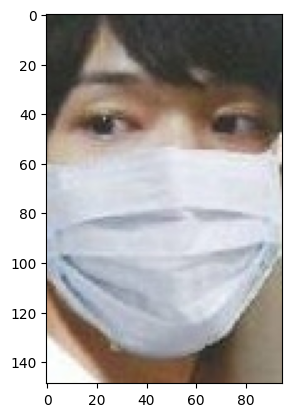

In [50]:
img = mpimg.imread('/content/data/with_mask/with_mask_125.jpg')# reads image in the form of numpy array
imgplot = plt.imshow(img)
plt.show()

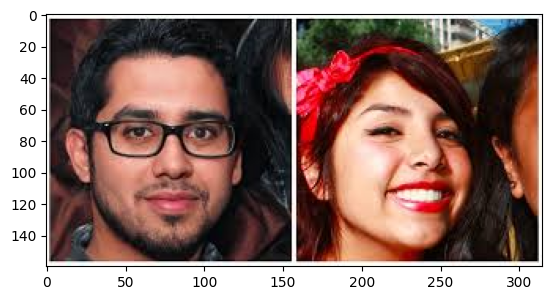

In [51]:
img = mpimg.imread('/content/data/without_mask/without_mask_1670.jpg')
plt.imshow(img)
plt.show()
#Even though images and plots might appear without explicitly calling plt.show(),
# it is still a good practice to include it to ensure that all figures are rendered properly and to maintain consistency.
#It can also help in controlling when and how figures are displayed, especially when dealing with multiple plots or complex visualizations.


Resize images
convert images ti numpy arrays

In [52]:
with_mask_path = '/content/data/with_mask/'

data=[] #empty list

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file) # eg. /content/data/with_mask/ + with_mask_106.jpg
  #reading images , concatinate
  image = image.resize((128,128))
  image = image.convert('RGB') # some r in the form of black and white, just coverting all of them to RGB
  image = np.array(image)
  data.append(image)


  without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB') # some r in the form of black and white, just coverting all of them to RGB
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


array([[[ 28,  32,  35],
        [ 25,  29,  32],
        [ 24,  28,  31],
        ...,
        [ 74,  70,  71],
        [112, 106, 100],
        [182, 174, 164]],

       [[ 27,  30,  35],
        [ 23,  26,  31],
        [ 22,  25,  30],
        ...,
        [ 91,  87,  89],
        [112, 107, 104],
        [148, 142, 135]],

       [[ 26,  29,  36],
        [ 28,  31,  37],
        [ 20,  22,  27],
        ...,
        [ 75,  70,  75],
        [ 82,  78,  78],
        [ 86,  80,  78]],

       ...,

       [[160, 136, 118],
        [158, 134, 116],
        [159, 133, 114],
        ...,
        [212, 208, 183],
        [214, 210, 185],
        [218, 214, 189]],

       [[160, 135, 120],
        [158, 133, 118],
        [157, 133, 117],
        ...,
        [211, 206, 183],
        [213, 209, 185],
        [216, 212, 187]],

       [[161, 134, 122],
        [158, 131, 119],
        [155, 132, 118],
        ...,
        [210, 205, 184],
        [213, 209, 185],
        [216, 212, 187]]], dtype=uint8)
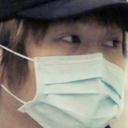

In [53]:
data[0]

In [54]:
type(data[0])

numpy.ndarray

In [55]:
data[0].shape #RGB

(128, 128, 3)

In [56]:
#converting list to numpy array
X=np.array(data)
Y=np.array(labels)

In [57]:
type(X)

numpy.ndarray

In [58]:
type(Y)

numpy.ndarray

In [59]:
X.shape

(7553, 128, 128, 3)

In [60]:
Y.shape

(7553,)

array([[[ 28,  32,  35],
        [ 25,  29,  32],
        [ 24,  28,  31],
        ...,
        [ 74,  70,  71],
        [112, 106, 100],
        [182, 174, 164]],

       [[ 27,  30,  35],
        [ 23,  26,  31],
        [ 22,  25,  30],
        ...,
        [ 91,  87,  89],
        [112, 107, 104],
        [148, 142, 135]],

       [[ 26,  29,  36],
        [ 28,  31,  37],
        [ 20,  22,  27],
        ...,
        [ 75,  70,  75],
        [ 82,  78,  78],
        [ 86,  80,  78]],

       ...,

       [[160, 136, 118],
        [158, 134, 116],
        [159, 133, 114],
        ...,
        [212, 208, 183],
        [214, 210, 185],
        [218, 214, 189]],

       [[160, 135, 120],
        [158, 133, 118],
        [157, 133, 117],
        ...,
        [211, 206, 183],
        [213, 209, 185],
        [216, 212, 187]],

       [[161, 134, 122],
        [158, 131, 119],
        [155, 132, 118],
        ...,
        [210, 205, 184],
        [213, 209, 185],
        [216, 212, 187]]], dtype=uint8)
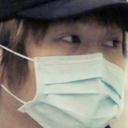

In [61]:
data[0]

In [62]:
X_train , X_test ,Y_train ,Y_test = train_test_split(X , Y ,test_size=0.2,random_state =2)

In [63]:
print(X_train.shape , X_test.shape ,Y_train.shape ,Y_test.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3) (6042,) (1511,)


In [64]:
#scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 81, 100, 132],
        [ 81, 100, 132],
        [ 80,  99, 131],
        ...,
        [ 77,  96, 128],
        [ 78,  97, 129],
        [ 78,  97, 129]],

       [[ 81, 100, 132],
        [ 81, 100, 132],
        [ 80,  99, 131],
        ...,
        [ 77,  96, 128],
        [ 78,  97, 129],
        [ 78,  97, 129]],

       [[ 84, 103, 135],
        [ 84, 103, 135],
        [ 83, 102, 134],
        ...,
        [ 77,  96, 128],
        [ 78,  97, 129],
        [ 78,  97, 129]]], dtype=uint8)
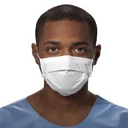

In [65]:
X_train[0]

In [66]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.31764706, 0.39215686, 0.51764706],
        [0.31764706, 0.39215686, 0.51764706],
        [0.31372549, 0

**Building neural network**

In [33]:
import tensorflow as tf
from tensorflow import keras

In [68]:
num_of_classes =2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))#turning og some neuron to avoid overfitting
#Dropout randomly "drops out" (sets to zero) a fraction of the neurons in the layer to which it is applied.
#In this case, 0.5 means that 50% of the neurons are dropped during each training step.
model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
#compile the NN

model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy',metrics=['acc'])